# 옥타브는 다음 그림과 같은 것이다.

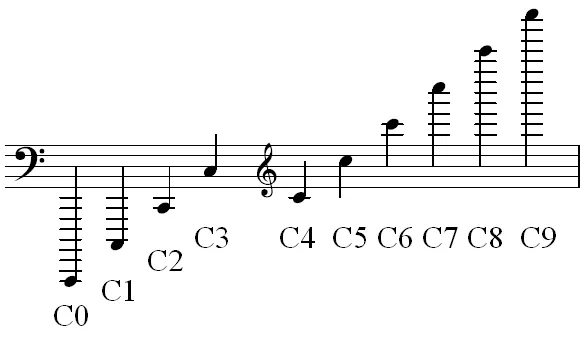

# 옥타브 ?

- 한 옥타브가 내려가면 주파수가 1/2배, 올라가면 2배, 한 음계 올라가면 2^ (1/12)배가 된다.
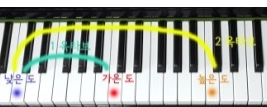

# 옥타브 그림 C1 ~ C2 가 한 옥타브
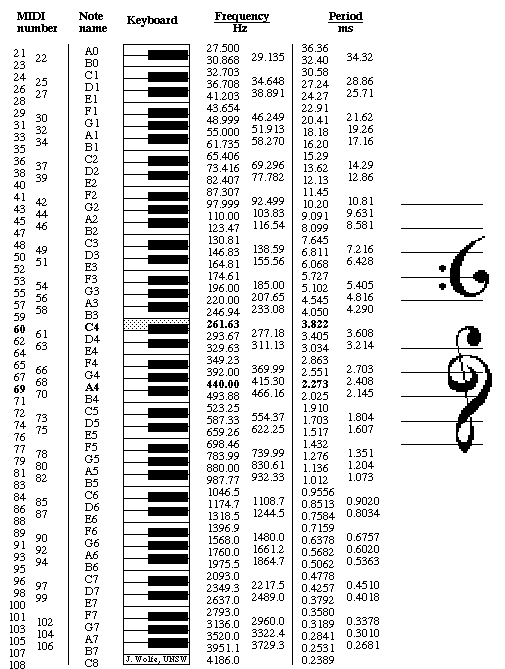

# 데이터 불러오기


In [114]:
import pandas as pd

input_file = pd.read_csv('train_data0307.csv')
target_file = pd.read_csv('target_data0307.csv')

In [87]:
input_file.head()

,sec,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan
0,0.0,[],[],[],[],ppp,0,0,100,0,0,0
1,0.1,"['note_on', 'note_on']","[0, 0]","[60, 60]","[21, 21]",ppp,0,2,0,0,0,0
2,0.2,[],[],[],[],NaN,0,0,0,0,0,0
3,0.3,"['note_on', 'note_on']","[0, 0]","[64, 64]","[32, 32]",ppp,0,2,0,0,0,0
4,0.4,[],[],[],[],NaN,0,0,0,0,0,0


In [88]:
target_file.head()

,sec,msg_type,channel,note,velocity,dynamic,accent,count,main_vol,depth,pedal,pan
0,0.0,['note_on'],[0],[60],[61],p,0,1,"[100, 100, 100]","[127, 127]",127,"[64, 64]"
1,0.1,[],[],[],[],NaN,0,0,0,0,0,0
2,0.2,['note_on'],[0],[64],[57],p,0,1,0,0,0,0
3,0.3,[],[],[],[],NaN,0,0,0,0,0,0
4,0.4,['note_on'],[0],[67],[56],p,0,1,0,0,0,0


# 옥타브 평가 알고리즘 변경

- 옥타브 별 범위를 제한해서, 새로운 컬럼을 만들어 판별하자.
- input_data의 octave 열과, target_data의 octave열을 만들어 서로 다른 행의 개수 뽑아서, input_data의 행의 개수로 나눈다.

# octave 컬럼 추가하기

In [90]:
def note_to_octave(note_number):
    """
    주어진 MIDI 노트 번호에 대응하는 옥타브 번호를 반환합니다.

    Parameters:
    - note_number: MIDI 노트 번호 (0 ~ 127)

    Returns:
    - octave: 해당 노트의 옥타브 번호
    """
    octave = (note_number // 12) - 1
    return octave

In [115]:
def add_new_octave_to_dataframe(input_file, target_file):
    """
    note값에 대해서 행마다 어떤 옥타브에 속해 있는지 판단한다.
    
    예상 결과
    octave : [4, 5] (4옥타브, 5옥타브)
    """
    input_file_note_status = [[{'note': x}, {'status': False}, {'velocity' : 0}] for x in range(128)]
    target_file_note_status = [[{'note': x}, {'status': False}, {'velocity' : 0}] for x in range(128)]

    input_octave_list = []
    target_octave_list = []
    
    # 인풋 데이터에 대해서 수행.
    for index in range(len(input_file)):

            target_temp_data = []

            notes_input = eval(input_file.at[index, 'note']) # 문자열을 -> 숫자로
            msg_type_input = eval(input_file.at[index, 'msg_type']) # 문자열을 -> 숫자로

            temp = list(zip(notes_input, msg_type_input)) # [(60, 'note_on'), (60, 'note_on')] 이와 같이 데이터 수정

            # 피아노 활성화 값 추적 
            for data in temp:
                if data[1] == 'note_on':
                    input_file_note_status[data[0]][1]['status'] = True
                elif data[1] == 'note_off':
                    input_file_note_status[data[0]][1]['status'] = False

            note_list = []

            for on_data in input_file_note_status:
                if on_data[1]['status'] == True:
                    note_list.append(on_data[0]['note'])
            
            octave_list = []
            
            for note in note_list:
                octave_list.append(note_to_octave(note))
                
            octave_list = set(octave_list)
            
            input_octave_list.append(list(octave_list))
    
    # 인풋 데이터에 대해서 수행.
    for index in range(len(target_file)):

            target_temp_data = []

            notes_target = eval(target_file.at[index, 'note']) # 문자열을 -> 숫자로
            msg_type_target = eval(target_file.at[index, 'msg_type']) # 문자열을 -> 숫자로

            temp = list(zip(notes_target, msg_type_target)) # [(60, 'note_on'), (60, 'note_on')] 이와 같이 데이터 수정

            # 피아노 활성화 값 추적 
            for data in temp:
                if data[1] == 'note_on':
                    target_file_note_status[data[0]][1]['status'] = True
                elif data[1] == 'note_off':
                    target_file_note_status[data[0]][1]['status'] = False

            note_list = []

            for on_data in target_file_note_status:
                if on_data[1]['status'] == True:
                    note_list.append(on_data[0]['note'])
            
            octave_list = []
            
            for note in note_list:
                octave_list.append(note_to_octave(note))
                
            octave_list = set(octave_list)
            
            target_octave_list.append(list(octave_list))

    input_file.insert(loc=5, column='new_octave', value=input_octave_list)
    target_file.insert(loc=5, column='new_octave', value=target_octave_list)

In [116]:
add_new_octave_to_dataframe(input_file, target_file)

In [99]:
input_file.to_csv('save.csv')

In [100]:
target_file.to_csv('save_taret.csv')

In [95]:
input_file.tail()

,sec,msg_type,channel,note,velocity,new_octave,dynamic,accent,count,main_vol,depth,pedal,pan
1201,120.1,[],[],[],[],"[2, 3, 4, 5]",NaN,0,0,0,0,0,0
1202,120.2,[],[],[],[],"[2, 3, 4, 5]",NaN,0,0,0,0,0,0
1203,120.3,[],[],[],[],"[2, 3, 4, 5]",NaN,0,0,0,0,0,0
1204,120.4,"['note_off', 'note_off']","[0, 0]","[64, 64]","[0, 0]","[2, 3, 4, 5]",ppp,0,2,0,0,0,0
1205,120.5,[],[],[],[],"[2, 3, 4, 5]",NaN,0,0,0,0,0,0


In [96]:
target_file.tail()

,sec,msg_type,channel,note,velocity,new_octave,dynamic,accent,count,main_vol,depth,pedal,pan
1209,120.9,[],[],[],[],{},NaN,0,0,0,0,0,0
1210,121.0,[],[],[],[],{},NaN,0,0,0,0,0,0
1211,121.1,[],[],[],[],{},NaN,0,0,0,0,0,0
1212,121.2,[],[],[],[],{},NaN,0,0,0,0,0,0
1213,121.3,[],[],[],[],{},NaN,0,0,0,0,0,0


# 기존 알고리즘

In [151]:
# 최종 코드
def calculate_euclidean_distance(notes1, notes2):
    if len(notes1) == 0 and len(notes2) == 0:
        return 0
    
    max_length = max(len(notes1), len(notes2))
    notes1 += [0] * (max_length - len(notes1))
    notes2 += [0] * (max_length - len(notes2))

    # 두 리스트 간의 유클리드 거리 계산
    distance = np.linalg.norm(np.array(notes1) - np.array(notes2))

    return distance

def calculate_octave_similarity(df_input, df_target):
    total_matched_octaves = 0
    total_notes = 0
    
    for index in range(len(df_input)):
        notes_input = eval(df_input.at[index, 'note'])
        notes_target = eval(df_target.at[index, 'note'])

        # 0으로 된 값 리스트로 처리
        if not isinstance(notes_input, list):
            notes_input = [notes_input]
        if not isinstance(notes_target, list):
            notes_target = [notes_target]

        # 벡터화 & 정규화
        input_octaves = list(set((note // 12) for note in notes_input))
        input_octaves = [octave / np.linalg.norm(input_octaves) for octave in input_octaves]
        target_octaves = list(set((note // 12) for note in notes_target))
        target_octaves = [octave / np.linalg.norm(target_octaves) for octave in target_octaves]
        # 현재 행의 일치하는 옥타브 수 초기화
        matched_octaves = 0
        
        # 한 행에 있는 리스트들 간의 비교
        # 수정된 부분: 유클리드 거리를 사용하여 옥타브 유사도 계산
        distance = calculate_euclidean_distance(input_octaves, target_octaves)
        similarity = 1 / (1 + distance)

        # 유사도가 일정 값 이상인 경우에 가중 점수 추가
        if similarity >= 0.8:
            matched_octaves += 1.2
        elif similarity >= 0.7:
            matched_octaves += 0.8
        elif similarity >= 0.6:
            matched_octaves += 0.6
        elif similarity >= .5:
            matched_octaves += 0.3

        total_matched_octaves += matched_octaves
        total_notes += len(set(input_octaves) | set(target_octaves))

    max_possible_matched_octaves = total_notes  # 모든 노트의 옥타브가 유사한 경우
    octave_similarity = min(100, (total_matched_octaves / max_possible_matched_octaves) * 100)

    return f'{octave_similarity:.2f}%'

In [153]:
octave_score = calculate_octave_similarity(input_file, target_file)

print(f'octave 정확도 결과: {octave_score}%')

octave 정확도 결과: 37.75%%


# 비교 알고리즘 작성

In [154]:
def calculate_octave_similarity(input_file, target_file, threshold=1):
    input_data_len = len(input_file)
    
    total_correct_octave_cnt = 0
    for index in range(len(input_file)):
        
        if index - threshold < 0:
            for i in range(0, threshold, 1):
                if target_file.at[index, 'new_octave'] == input_file.at[index+i, 'new_octave']:
                    total_correct_octave_cnt+=1
                    break
        else:
            # threshold 만큼 앞을 탐색해서 있으면 점수 부여
            for i in range(-threshold, threshold, 1):
                if target_file.at[index, 'new_octave'] == input_file.at[index+i, 'new_octave']:
                    total_correct_octave_cnt+=1
                    break

    
    return total_correct_octave_cnt / input_data_len * 100

In [156]:
octave_score = calculate_octave_similarity(input_file, target_file, threshold=3)

print(f'octave 정확도 결과: {int(octave_score)}%')

octave 정확도 결과: 91%
